In [238]:
import pandas as pd
import numpy as np
import torch

In [239]:
df = pd.read_csv('data/houseprice.csv',
               usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                        "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"])
df = df.dropna()  # 결측치 제거
print(df.shape)
df

(1201, 10)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000
...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,1999,953,694,175000
1456,20,RL,85.0,13175,Pave,Reg,1978,2073,0,210000
1457,70,RL,66.0,9042,Pave,Reg,1941,1188,1152,266500
1458,20,RL,68.0,9717,Pave,Reg,1950,1078,0,142125


In [240]:
df.info()  # Dataframe 정보 확인

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [241]:
# nn.Embedding을 위해 유니크한 값의 수 확인
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [242]:
import datetime
datetime.datetime.now().year

2023

In [243]:
# 지어진지 얼마나 되었나 라는 항목 새로 추가
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']

# 기존에 있던 지어진 날짜 항목 제거
df.drop("YearBuilt",axis=1,inplace=True)  # axis=1 -> 세로방향 모두 삭제
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,20
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,47
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,22
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,108
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,23
...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,953,694,175000,24
1456,20,RL,85.0,13175,Pave,Reg,2073,0,210000,45
1457,70,RL,66.0,9042,Pave,Reg,1188,1152,266500,82
1458,20,RL,68.0,9717,Pave,Reg,1078,0,142125,73


In [244]:
# 추가실습: Totle Year이 100년이 넘어가는 행 삭제
df.drop(index=df[df['Total Years']>100].index)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,20
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,47
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,22
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,23
5,50,RL,85.0,14115,Pave,IR1,796,566,143000,30
...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,953,694,175000,24
1456,20,RL,85.0,13175,Pave,Reg,2073,0,210000,45
1457,70,RL,66.0,9042,Pave,Reg,1188,1152,266500,82
1458,20,RL,68.0,9717,Pave,Reg,1078,0,142125,73


In [245]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [246]:
categorical_features = ["MSSubClass", "MSZoning", "Street", "LotShape"]
numerical_features = list(set(df.columns) - set(categorical_features) - set(['SalePrice']))

In [247]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in categorical_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [248]:
print(lbl_encoders['Street'].classes_)
print(lbl_encoders['Street'].inverse_transform(np.array([0, 1])))

['Grvl' 'Pave']
['Grvl' 'Pave']


In [249]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,20
1,0,3,80.0,9600,1,3,1262,0,181500,47
2,5,3,68.0,11250,1,0,920,866,223500,22
3,6,3,60.0,9550,1,0,961,756,140000,108
4,5,3,84.0,14260,1,0,1145,1053,250000,23
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,24
1456,0,3,85.0,13175,1,3,2073,0,210000,45
1457,6,3,66.0,9042,1,3,1188,1152,266500,82
1458,0,3,68.0,9717,1,3,1078,0,142125,73


In [250]:
# Normalization
df_numerical = df[numerical_features]
df_min = df_numerical.min()
df_max = df_numerical.max()

df_numerical = (df_numerical - df_min) / (df_max - df_min)

In [251]:
df_numerical

,1stFlrSF,2ndFlrSF,Total Years,LotArea,LotFrontage
0,0.119780,0.413559,0.050725,0.033420,0.150685
1,0.212942,0.000000,0.246377,0.038795,0.202055
2,0.134465,0.419370,0.065217,0.046507,0.160959
3,0.143873,0.366102,0.688406,0.038561,0.133562
4,0.186095,0.509927,0.072464,0.060576,0.215753
...,...,...,...,...,...
1455,0.142038,0.336077,0.079710,0.030929,0.140411
1456,0.399036,0.000000,0.231884,0.055505,0.219178
1457,0.195961,0.557869,0.500000,0.036187,0.154110
1458,0.170721,0.000000,0.434783,0.039342,0.160959


In [252]:
np_categorical = np.stack([df[name] for name in categorical_features], 1)
torch_categorical = torch.tensor(np_categorical, dtype=torch.int64)

In [253]:
np_numerical = np.stack([df[name] for name in numerical_features], 1)
torch_numerical = torch.tensor(np_numerical, dtype=torch.float)

In [254]:
y = torch.tensor(df['SalePrice'], dtype=float).reshape(-1, 1)

In [255]:
categorical_dims=[len(df[col].unique()) for col in categorical_features]
categorical_dims

[15, 5, 2, 4]

In [256]:
# 대충.. dimension size 정하기
embedding_dim = [(x, min(50, (x + 1) // 2)) for x in categorical_dims]
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [257]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [258]:
class SimplePredictor(nn.Module):
    def __init__(self, embedding_dim, n_cont, out_sz, layers, dropout_p=0.2):
        super(SimplePredictor, self).__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp, out in embedding_dim])
        self.emb_drop = nn.Dropout(dropout_p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(dropout_p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i, emded in enumerate(self.embeds):
            embeddings.append(emded(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [259]:
model=SimplePredictor(embedding_dim,
                      len(numerical_features),
                      1,
                      [64, 32],
                      dropout_p=0.5)  # dropout_p 0.2 -> Overfitting

In [260]:
model

SimplePredictor(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.5, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [261]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01, weight_decay=0.005)  # add L2 norm

In [262]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0.005
)

In [263]:
# CONFIGS
BATCH_SIZE=1280
TRAIN_RATIO=0.8
EPOCHS=10000

In [264]:
from torch.utils.data import Dataset, DataLoader

class HousePriceDataset(Dataset):
    def __init__(self, categorical_x, numerical_x, y):
        self.categorical_x = categorical_x
        self.numerical_x = numerical_x
        self.y = y

    def __getitem__(self, idx):
        return self.categorical_x[idx], self.numerical_x[idx], self.y[idx]

    def __len__(self):
        return len(self.categorical_x)

In [265]:
train_split = int(TRAIN_RATIO * np_numerical.shape[0])
train_dataset = HousePriceDataset(torch_categorical[:train_split], torch_numerical[:train_split], y[:train_split])
test_dataset = HousePriceDataset(torch_categorical[train_split:], torch_numerical[train_split:], y[train_split:])

In [266]:
y[train_split:].shape

torch.Size([241, 1])

In [267]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=BATCH_SIZE)

In [268]:
print(torch_categorical.shape)
print(torch_numerical.shape)
print(y.shape)

torch.Size([1201, 4])
torch.Size([1201, 5])
torch.Size([1201, 1])


In [269]:
train_losses=[]
test_losses=[]

for epoch in range(EPOCHS):
    train_epoch_loss = 0.
    test_epoch_loss = 0.

    # Train
    model.train()
    for i, (x_categorical, x_numerical, y) in enumerate(train_dataloader):
        y = y.float()
        y_pred=model(x_categorical, x_numerical)
        loss=torch.sqrt(loss_function(y_pred, y))  ### RMSE
        train_epoch_loss += loss.item()
        # if epoch % 50 == 0:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_epoch_loss /= len(train_dataloader)
    print("TRAIN/Epoch number: {} and the loss : {}".format(epoch, train_epoch_loss))
    train_losses.append(train_epoch_loss)

    # Test
    model.eval()
    for i, (x_categorical, x_numerical, y) in enumerate(test_dataloader):
        y = y.float()
        y_pred=model(x_categorical, x_numerical)
        loss=torch.sqrt(loss_function(y_pred, y))  ### RMSE
        test_epoch_loss += loss.item()

    test_epoch_loss /= len(test_dataloader)
    print("TEST/Epoch number: {} and the loss : {}".format(epoch, test_epoch_loss))
    test_losses.append(test_epoch_loss / len(test_dataloader))

TRAIN/Epoch number: 0 and the loss : 199209.953125
TEST/Epoch number: 0 and the loss : 198474.671875
TRAIN/Epoch number: 1 and the loss : 199209.8125
TEST/Epoch number: 1 and the loss : 198474.546875
TRAIN/Epoch number: 2 and the loss : 199209.609375
TEST/Epoch number: 2 and the loss : 198474.34375
TRAIN/Epoch number: 3 and the loss : 199209.453125
TEST/Epoch number: 3 and the loss : 198474.0625
TRAIN/Epoch number: 4 and the loss : 199209.25
TEST/Epoch number: 4 and the loss : 198473.734375
TRAIN/Epoch number: 5 and the loss : 199209.125
TEST/Epoch number: 5 and the loss : 198473.34375
TRAIN/Epoch number: 6 and the loss : 199208.890625
TEST/Epoch number: 6 and the loss : 198472.90625
TRAIN/Epoch number: 7 and the loss : 199208.6875
TEST/Epoch number: 7 and the loss : 198472.4375
TRAIN/Epoch number: 8 and the loss : 199208.5
TEST/Epoch number: 8 and the loss : 198471.9375
TRAIN/Epoch number: 9 and the loss : 199208.265625
TEST/Epoch number: 9 and the loss : 198471.484375
TRAIN/Epoch num

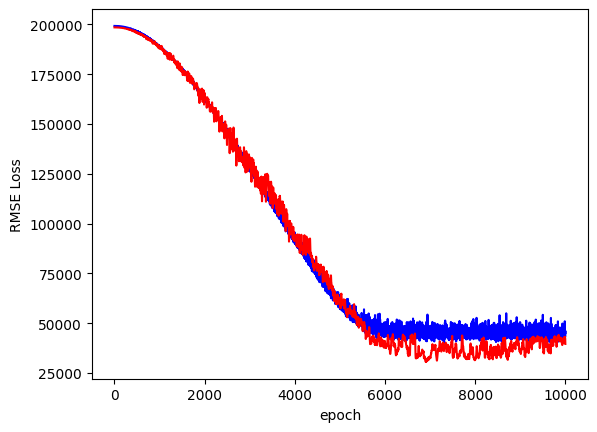

In [272]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(train_losses)), train_losses, color='blue')
plt.plot(range(len(test_losses)), test_losses, color='red')

plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [275]:
torch.save(model.state_dict(), '02_house_price_prediction.pt')